In [ ]:
import os
import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

parent_dir = "/content/drive/My Drive/Colab Notebooks/YOLOV8 Classification"
annotations_folder = "/content/drive/My Drive/Colab Notebooks/YOLOV8 Classification/model_annotations"
csv_file = "/content/drive/My Drive/Colab Notebooks/YOLOV8 Classification/union_final_type_of_coffee.csv"
print(f"CSV file exists: {os.path.exists(csv_file)}")

# Path to the new folder for modified annotation files
crema_annotations_folder = '/content/drive/My Drive/Colab Notebooks/YOLOV8 Classification/crema_annotations'
os.makedirs(crema_annotations_folder, exist_ok=True)

# Read the CSV file
df = pd.read_csv(csv_file)
print("DataFrame loaded. First few rows:")
print(df.head())

# Create a mapping from Image_Name to Crema
# Remove file extension from image names before creating the mapping
image_name_to_crema = df.set_index(df['image_name'].apply(lambda x: os.path.splitext(x)[0]))['crema'].to_dict()

print("Image name to crema mapping:")
print(image_name_to_crema)

# Function to replace class IDs in the annotation files and save to new folder
def replace_class_ids_and_save(annotation_file, crema_label, new_file_path):
    print(f"Processing file: {annotation_file}")
    with open(annotation_file, 'r') as file:
        lines = file.readlines()

    if not lines:
        print(f"No lines to process in {annotation_file}")

    with open(new_file_path, 'w') as file:
        for line in lines:
            parts = line.strip().split()
            if len(parts) >= 5:
                # Replace the class ID with the crema label
                parts[0] = str(crema_label)
                file.write(' '.join(parts) + '\n')
            else:
                print(f"Unexpected line format in {annotation_file}: {line}")
    print(f"Saved modified file to: {new_file_path}")

# Iterate over all annotation files in the folder
annotation_files = os.listdir(annotations_folder)
print(f"Found {len(annotation_files)} annotation files.")

for annotation_filename in annotation_files:
    if annotation_filename.endswith('.txt'):
        # Extract the base name (without extension) to match with Image_Name in CSV
        image_name = os.path.splitext(annotation_filename)[0]
        print(f"Checking image name: {image_name}")
        if image_name in image_name_to_crema.keys():
            crema_label = image_name_to_crema[image_name]
            annotation_file_path = os.path.join(annotations_folder, annotation_filename)
            new_file_path = os.path.join(crema_annotations_folder, annotation_filename + '.txt')
            replace_class_ids_and_save(annotation_file_path, crema_label, new_file_path)
        else:
            print(f"No crema label found for image name: {image_name}")
    else:
        print(f"Skipping non-txt file: {annotation_filename}")

print("Class IDs replaced and saved to new folder successfully.")

# Verify the contents of the crema_annotations_folder
print("Contents of crema_annotations_folder:")
for annotation_filename in os.listdir(crema_annotations_folder):
    print(annotation_filename)

Streaming output truncated to the last 5000 lines.
coffe_image(525)_augmented_4.txt.txt
coffe_image(484)_augmented_1.txt.txt
coffe_image(461)_augmented_7.txt.txt
coffe_image(172)_augmented_5.txt.txt
coffe_image(393)_augmented_5.txt.txt
coffe_image(351)_augmented_8.txt.txt
coffe_image(30)_augmented_2.txt.txt
coffe_image(553).txt.txt
coffe_image(227)_augmented_9.txt.txt
coffe_image(626)_augmented_10.txt.txt
coffe_image(410)_augmented_3.txt.txt
coffe_image(318)_augmented_6.txt.txt
coffe_image(75)_augmented_5.txt.txt
coffe_image(457)_augmented_8.txt.txt
coffe_image(190)_augmented_2.txt.txt
coffe_image(594)_augmented_1.txt.txt
coffe_image(543)_augmented_2.txt.txt
coffe_image(588).txt.txt
coffe_image(531)_augmented_7.txt.txt
coffe_image(339)_augmented_4.txt.txt
coffe_image(414)_augmented_12.txt.txt
coffe_image(191)_augmented_1.txt.txt
coffe_image(510)_augmented_1.txt.txt
coffe_image(517)_augmented_1.txt.txt
coffe_image(386)_augmented_6.txt.txt
coffe_image(257)_augmented_7.txt.txt
coffe_image

In [ ]:
# Iterate over the files in the annotations folder
for annotation_filename in os.listdir(crema_annotations_folder):
    # Check if the file is a text file
    if annotation_filename.endswith('.txt'):
        # Remove the extra .txt extension from the filename
        new_image_name = os.path.splitext(annotation_filename)[0]
        old_file_path = os.path.join(crema_annotations_folder, annotation_filename)
        new_file_path = os.path.join(crema_annotations_folder, new_image_name)
        os.rename(old_file_path, new_file_path)

        # Rest of your logic here...
    else:
        print(f"Skipping non-txt file: {annotation_filename}")

In [ ]:
# Iterate over the files in the annotations folder
for annotation_filename in os.listdir(crema_annotations_folder):
    # Check if the file is a text file
    if annotation_filename.endswith('.txt'):
        # Remove the extra .txt extension from the filename
        new_image_name = os.path.splitext(annotation_filename)[0]
        old_file_path = os.path.join(crema_annotations_folder, annotation_filename)
        new_file_path = os.path.join(crema_annotations_folder, new_image_name)
        os.rename(old_file_path, new_file_path)

        # Rest of your logic here...
    else:
        print(f"Skipping non-txt file: {annotation_filename}")

NameError: name 'fannotation_filename' is not defined

TRain

In [ ]:
!pip install ultralytics
from ultralytics import YOLO
from google.colab import drive
import os
# Mount Google Drive
drive.mount('/content/drive')
# Load the pre-trained YOLOv8 model with the coffee cup weights
model = YOLO("/content/drive/My Drive/Colab Notebooks/YOLOV8 Photos/yolov8n.pt")


# Define the path to save the trained model
save_dir = "/content/drive/My Drive/Colab Notebooks/YOLOV8 Classification/crema_runs"

# Fine-tune the model on the new dataset and save it to the specified directory
model.train(data='/content/drive/My Drive/Colab Notebooks/YOLOV8 Classification/config_crema.yaml',
            epochs=30, imgsz=224, project=save_dir, name='finetune_crema_run')

print("Model training completed and saved.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Ultralytics YOLOv8.2.29 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=/content/drive/My Drive/Colab Notebooks/YOLOV8 Photos/yolov8n.pt, data=/content/drive/My Drive/Colab Notebooks/YOLOV8 Classification/config_crema.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/drive/My Drive/Colab Notebooks/YOLOV8 Classification/crema_runs, name=finetune_crema_run5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7,

train: Scanning /content/drive/My Drive/Colab Notebooks/YOLOV8 Classification/crema_Dataset/train/labels... 4659 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4659/4659 [02:08<00:00, 36.35it/s]


train: New cache created: /content/drive/My Drive/Colab Notebooks/YOLOV8 Classification/crema_Dataset/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/My Drive/Colab Notebooks/YOLOV8 Classification/crema_Dataset/val/labels... 1165 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1165/1165 [00:24<00:00, 47.20it/s] 


val: New cache created: /content/drive/My Drive/Colab Notebooks/YOLOV8 Classification/crema_Dataset/val/labels.cache
Plotting labels to /content/drive/My Drive/Colab Notebooks/YOLOV8 Classification/crema_runs/finetune_crema_run5/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 224 train, 224 val
Using 0 dataloader workers
Logging results to /content/drive/My Drive/Colab Notebooks/YOLOV8 Classification/crema_runs/finetune_crema_run5
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30         0G      1.813      2.354      1.938          8        224: 100%|██████████| 292/292 [08:59<00:00,  1.85s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [01:08<00:00,  1.86s/it]


                   all       1165       1548      0.846      0.314      0.368      0.225

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30         0G        1.5      1.974      1.741          6        224: 100%|██████████| 292/292 [08:54<00:00,  1.83s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [01:05<00:00,  1.78s/it]

                   all       1165       1548      0.337      0.511      0.327      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30         0G      1.476       1.91      1.724          9        224: 100%|██████████| 292/292 [08:48<00:00,  1.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [01:05<00:00,  1.77s/it]

                   all       1165       1548      0.285      0.612      0.369      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30         0G      1.434      1.855      1.679         12        224: 100%|██████████| 292/292 [08:48<00:00,  1.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [01:05<00:00,  1.78s/it]

                   all       1165       1548      0.268      0.473      0.337      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30         0G      1.387      1.776      1.654          4        224: 100%|██████████| 292/292 [08:46<00:00,  1.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [01:08<00:00,  1.84s/it]


                   all       1165       1548      0.293      0.538      0.338      0.218

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30         0G      1.354      1.694      1.623          8        224: 100%|██████████| 292/292 [08:46<00:00,  1.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [01:05<00:00,  1.77s/it]

                   all       1165       1548      0.393      0.483      0.457      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30         0G      1.324      1.646      1.599          8        224: 100%|██████████| 292/292 [08:45<00:00,  1.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [01:05<00:00,  1.78s/it]


                   all       1165       1548      0.498      0.515      0.494      0.336

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30         0G        1.3      1.606       1.58          8        224: 100%|██████████| 292/292 [08:49<00:00,  1.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [01:07<00:00,  1.82s/it]

                   all       1165       1548      0.561      0.473        0.5      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30         0G        1.3      1.576      1.577         14        224: 100%|██████████| 292/292 [08:42<00:00,  1.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [01:08<00:00,  1.84s/it]

                   all       1165       1548      0.535      0.478      0.412      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30         0G      1.274      1.526      1.565         13        224: 100%|██████████| 292/292 [08:46<00:00,  1.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [01:05<00:00,  1.76s/it]

                   all       1165       1548      0.601      0.632      0.621      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30         0G      1.263      1.511      1.558          8        224: 100%|██████████| 292/292 [08:40<00:00,  1.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [01:06<00:00,  1.78s/it]

                   all       1165       1548      0.658      0.531      0.583      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30         0G      1.231      1.457      1.532         10        224: 100%|██████████| 292/292 [08:41<00:00,  1.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [01:09<00:00,  1.87s/it]

                   all       1165       1548       0.69       0.61      0.632      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30         0G      1.234       1.45      1.537         10        224: 100%|██████████| 292/292 [08:43<00:00,  1.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [01:05<00:00,  1.77s/it]

                   all       1165       1548      0.605      0.531      0.522      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30         0G      1.222      1.413      1.531         12        224: 100%|██████████| 292/292 [08:45<00:00,  1.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [01:06<00:00,  1.79s/it]

                   all       1165       1548      0.651      0.592       0.64      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30         0G      1.207      1.416      1.522          4        224: 100%|██████████| 292/292 [08:41<00:00,  1.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [01:05<00:00,  1.77s/it]

                   all       1165       1548      0.691      0.657      0.677      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30         0G      1.187      1.397      1.506         10        224: 100%|██████████| 292/292 [08:38<00:00,  1.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [01:06<00:00,  1.81s/it]

                   all       1165       1548      0.593      0.602       0.58      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30         0G       1.17      1.366      1.492         14        224: 100%|██████████| 292/292 [08:40<00:00,  1.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [01:06<00:00,  1.79s/it]

                   all       1165       1548      0.566      0.603      0.569      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30         0G      1.152      1.333       1.48         11        224: 100%|██████████| 292/292 [08:40<00:00,  1.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [01:08<00:00,  1.85s/it]

                   all       1165       1548       0.65      0.635      0.645      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30         0G      1.166      1.339      1.491         10        224: 100%|██████████| 292/292 [08:47<00:00,  1.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [01:05<00:00,  1.78s/it]

                   all       1165       1548      0.639      0.634      0.627      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30         0G      1.144       1.32      1.474         13        224: 100%|██████████| 292/292 [08:48<00:00,  1.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [01:04<00:00,  1.76s/it]

                   all       1165       1548      0.719      0.671       0.68      0.522


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30         0G     0.9108      1.047      1.333          3        224: 100%|██████████| 292/292 [08:39<00:00,  1.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [01:07<00:00,  1.82s/it]

                   all       1165       1548      0.673      0.662       0.68      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30         0G     0.8642     0.9429      1.306          4        224: 100%|██████████| 292/292 [08:39<00:00,  1.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [01:07<00:00,  1.83s/it]

                   all       1165       1548      0.764      0.678      0.761      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30         0G      0.836     0.9171      1.292          5        224: 100%|██████████| 292/292 [08:43<00:00,  1.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [01:07<00:00,  1.81s/it]

                   all       1165       1548      0.717      0.653      0.726      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30         0G     0.8214      0.899      1.284          5        224: 100%|██████████| 292/292 [08:44<00:00,  1.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [01:07<00:00,  1.84s/it]

                   all       1165       1548      0.721       0.67      0.743      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30         0G     0.8178     0.8579      1.284          3        224: 100%|██████████| 292/292 [08:48<00:00,  1.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [01:09<00:00,  1.88s/it]

                   all       1165       1548      0.692      0.694      0.735      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30         0G     0.7915     0.8285       1.27          4        224: 100%|██████████| 292/292 [08:43<00:00,  1.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [01:06<00:00,  1.81s/it]

                   all       1165       1548      0.719      0.689      0.747      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30         0G     0.7634     0.8071      1.249          3        224: 100%|██████████| 292/292 [08:46<00:00,  1.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [01:05<00:00,  1.77s/it]

                   all       1165       1548      0.828      0.673      0.798      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30         0G      0.759     0.7947      1.248          3        224: 100%|██████████| 292/292 [08:46<00:00,  1.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [01:07<00:00,  1.83s/it]

                   all       1165       1548      0.764      0.716      0.787      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30         0G     0.7326     0.7658       1.23          6        224: 100%|██████████| 292/292 [08:49<00:00,  1.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [01:08<00:00,  1.84s/it]

                   all       1165       1548      0.736       0.72      0.768      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30         0G     0.7253     0.7609      1.224          3        224: 100%|██████████| 292/292 [08:48<00:00,  1.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [01:08<00:00,  1.86s/it]

                   all       1165       1548      0.769      0.718      0.796      0.658



30 epochs completed in 4.946 hours.
Optimizer stripped from /content/drive/My Drive/Colab Notebooks/YOLOV8 Classification/crema_runs/finetune_crema_run5/weights/last.pt, 6.2MB
Optimizer stripped from /content/drive/My Drive/Colab Notebooks/YOLOV8 Classification/crema_runs/finetune_crema_run5/weights/best.pt, 6.2MB

Validating /content/drive/My Drive/Colab Notebooks/YOLOV8 Classification/crema_runs/finetune_crema_run5/weights/best.pt...
Ultralytics YOLOv8.2.29 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [01:05<00:00,  1.77s/it]


                   all       1165       1548      0.769      0.718      0.796      0.658
              No_Crema        273        335      0.726      0.721      0.777      0.645
                 Crema        892       1213      0.812      0.716      0.815      0.671
Speed: 0.8ms preprocess, 42.7ms inference, 0.0ms loss, 0.4ms postprocess per image
Results saved to /content/drive/My Drive/Colab Notebooks/YOLOV8 Classification/crema_runs/finetune_crema_run5
Model training completed and saved.


Test

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

image 1/1 /content/drive/My Drive/Colab Notebooks/YOLOV8 Classification/crema_Dataset/test/images/coffe_image(23)_augmented_11.jpg: 224x224 1 Crema, 162.8ms
Speed: 6.3ms preprocess, 162.8ms inference, 23.8ms postprocess per image at shape (1, 3, 224, 224)

image 1/1 /content/drive/My Drive/Colab Notebooks/YOLOV8 Classification/crema_Dataset/test/images/coffe_image(242)_augmented_4.jpg: 224x224 1 Crema, 36.3ms
Speed: 0.5ms preprocess, 36.3ms inference, 0.7ms postprocess per image at shape (1, 3, 224, 224)

image 1/1 /content/drive/My Drive/Colab Notebooks/YOLOV8 Classification/crema_Dataset/test/images/coffe_image(582)_augmented_7.jpg: 224x224 1 Crema, 58.8ms
Speed: 0.6ms preprocess, 58.8ms inference, 1.4ms postprocess per image at shape (1, 3, 224, 224)

image 1/1 /content/drive/My Drive/Colab Notebooks/YOLOV8 Classification/crema_Dataset/test/images/coffe_i

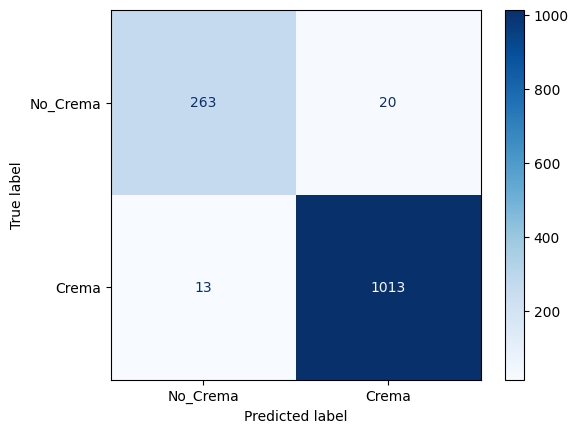

In [6]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
!pip install ultralytics
from google.colab import drive
import os
# Mount Google Drive
drive.mount('/content/drive')
from ultralytics import YOLO  # Assuming the YOLO library is correctly installed

# Paths to your dataset and model
images_folder = "/content/drive/My Drive/Colab Notebooks/YOLOV8 Classification/crema_Dataset/test/images/"
labels_folder = "/content/drive/My Drive/Colab Notebooks/YOLOV8 Classification/crema_Dataset/test/labels/"
model_path = "/content/drive/My Drive/Colab Notebooks/YOLOV8 Classification/crema_runs/finetune_crema_run5/weights/best.pt"

# Load the model
model = YOLO(model_path)

# Class labels
class_labels = ['No_Crema', 'Crema']

# Initialize lists to hold true and predicted labels
true_labels = []
predicted_labels = []

# Iterate over the images in the test folder
for image_path in glob.glob(os.path.join(images_folder, "*.jpg")):
    # Get the corresponding label file
    label_file = os.path.join(labels_folder, os.path.basename(image_path).replace(".jpg", ".txt"))

    # Read the true label
    with open(label_file, 'r') as file:
        true_class_id = int(file.readline().strip().split()[0])
        true_labels.append(true_class_id)

    # Perform prediction
    results = model.predict(image_path, device='cpu', conf=0.5)

    # Extract the predicted class with the highest confidence
    if len(results) > 0 and len(results[0].boxes) > 0:
        predicted_class_id = int(results[0].boxes[0].cls)
    else:
        predicted_class_id = -1  # If no prediction is made, assign an invalid class ID

    predicted_labels.append(predicted_class_id)

# Calculate the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels, labels=[0, 1])

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap=plt.cm.Blues)
plt.show()